<a href="https://colab.research.google.com/github/swethanjali24/logistic_regression_assignment/blob/main/Logistic_regression_DryBean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the libraries
!pip install numpy pandas matplotlib seaborn

# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data from drive
Bean_df=pd.read_csv('/content/drive/MyDrive/assignments-BE/Logistic Regression/Dry_Bean_Dataset.csv')




In [ ]:
#EDA
print(Bean_df.head())# three different datatypes for input and output and all the input columns are numerical in nature.
Bean_df.describe()
Bean_df.Class.value_counts()# Slighlty imbalanced data as class 'Bombay' has fewer data compared to others







    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


<Axes: >

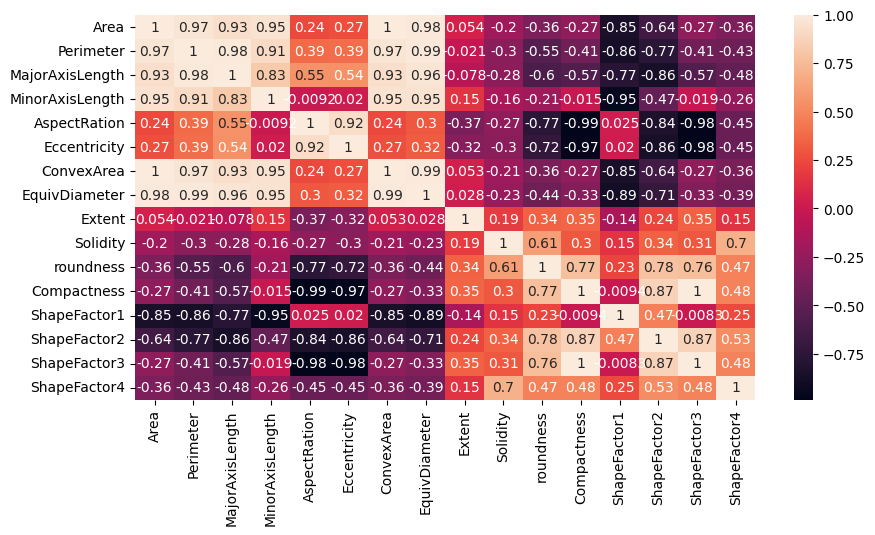

In [ ]:
# Data Visualization
Bean_df_inputs=Bean_df.drop('Class',axis=1)
Bean_df_inputs.info()
Bean_df_inputs.corr()# Difficult to conclude because of its size
plt.figure(figsize=(10,5))
sns.heatmap(Bean_df_inputs.corr(),annot=True)


In [ ]:
# Separating the input and output data
X=Bean_df_inputs
y=Bean_df['Class']

In [ ]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
# Loading the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
# Fitting the data
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# evaluating the performance
from sklearn import metrics
print('Training performance-')
print('Accuracy score:',metrics.accuracy_score(y_train,y_train_pred))
print('\n\nTesting performance-')
print('Accuracy score:',metrics.accuracy_score(y_test,y_test_pred))


Training performance-
Accuracy score: 0.6971895664952241


Testing performance-
Accuracy score: 0.7150201983106867


In [ ]:
rint('precision score:',metrics.precision_score(y_train,y_train_pred))
print('recall score:',metrics.recall_score(y_train,y_train_pred))
print('f1 score:',metrics.f1_score(y_train,y_train_pred))

print('precision score:',metrics.precision_score(y_test,y_test_pred))
print('recall score:',metrics.recall_score(y_test,y_test_pred))
print('f1 score:',metrics.f1_score(y_test,y_test_pred))

In [ ]:
# accuracy is less,hence we do eda, trying to remove the correlated features


In [ ]:
#EDA
# WE will remove area and perimeter columns as they are highly correlated with major axis and minor axis length


In [ ]:
Bean_df_inputs_1=Bean_df_inputs.drop(['Area','Perimeter'],axis=1)
Bean_df_inputs_1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  13611 non-null  float64
 1   MinorAxisLength  13611 non-null  float64
 2   AspectRation     13611 non-null  float64
 3   Eccentricity     13611 non-null  float64
 4   ConvexArea       13611 non-null  int64  
 5   EquivDiameter    13611 non-null  float64
 6   Extent           13611 non-null  float64
 7   Solidity         13611 non-null  float64
 8   roundness        13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     13611 non-null  float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.5 MB


In [ ]:
X=Bean_df_inputs_1
y=Bean_df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('Training performance-')
print('Accuracy score:',metrics.accuracy_score(y_train,y_train_pred))
print('\n\nTesting performance-')
print('Accuracy score:',metrics.accuracy_score(y_test,y_test_pred))

Training performance-
Accuracy score: 0.8602130786186627


Testing performance-
Accuracy score: 0.8567756151303709


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# the accuracy score has improved!!😁